# Palmer Penguins - Data Exploration 🗺🧭🐧

Los Palmer Penguins son un conjunto de datos introducido como una alternativa al muy usado conjunto de datos de Iris para tareas de clasificación y visualización en ciencia de datos. Este conjunto incluye medidas de tres especies diferentes de pingüinos encontrados en las islas Palmer, cerca de la Antártida. Las especies son: Adelie, Chinstrap, y Gentoo. Las medidas recogidas incluyen el tamaño de la aleta (flipper), la longitud del pico, la profundidad del pico, y la masa corporal de los pingüinos, además del sexo y la isla en la que fue encontrado cada ejemplar. Este conjunto de datos es particularmente útil para enseñar análisis de datos y técnicas de machine learning debido a su tamaño manejable, su estructura limpia, y porque permite la exploración de conceptos como la clasificación, la regresión y la agrupación.

![Palmer Penguins](https://media.istockphoto.com/id/163344719/photo/antarctica-king-penguin-head.jpg?s=612x612&w=0&k=20&c=VuB9z3mmq031UONGxjc5tKgRd0N3dKHJymKatIImFZo=)

## Importacion de librerias

In [70]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

### Establecer apariencia general de los gráficos

In [71]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

# Cargar los datos

## Utilizando el paquete palmerpenguins

Datos crudos

In [72]:
raw_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv')
raw_penguins_df.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


Datos previamente procesados

In [73]:
preproccessed_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
preproccessed_penguins_df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


# Análisis exploratorio de datos

## Validación de datos

### ¿Qué estructura general tiene la base de datos?

In [74]:
(
    preproccessed_penguins_df
.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### ¿Qué tipo de dato son las variables del conjunto de datos?

In [75]:
preproccessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [76]:
(
    preproccessed_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [77]:
preproccessed_penguins_df.shape

(344, 8)

### Existen valores nulos explicitos en el conjunto de datos?

In [78]:
(
    preproccessed_penguins_df
    .isna()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [79]:
(
    preproccessed_penguins_df
    .isna()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [80]:
(
    preproccessed_penguins_df
    .isna()
    .sum()
    .sum()
)

19

### ¿Cuál es la proporción de valores nulos por cada variable?

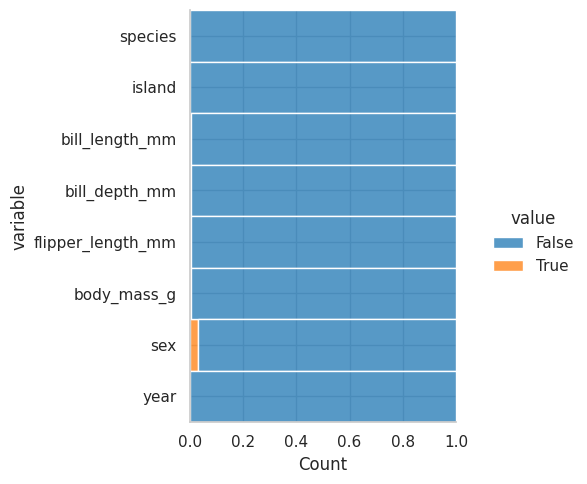

In [81]:
(
    preproccessed_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:  (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
            )
        )
    )
)

### ¿Cómo podemos visualizar Ios valores nulos en todo el conjunto de datos?

In [82]:
(
    preproccessed_penguins_df
    .isna()
    .transpose()
)

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

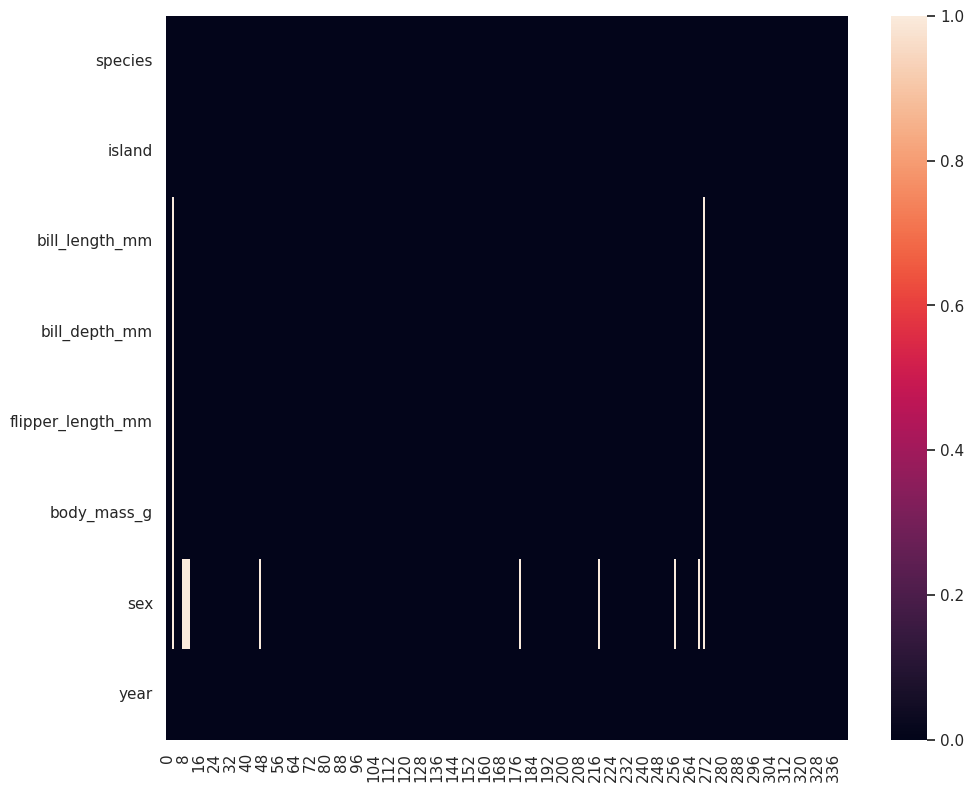

In [83]:
(
    preproccessed_penguins_df
    .isna()
    .transpose()
    .pipe(
        lambda df:  (
            sns.heatmap(
                data=df
            )
        )
    )
)

### ¿Cuántas observaciones perdemos si eliminamos Ios datos faltantes?

In [84]:
penguins_df =(
    preproccessed_penguins_df
    .dropna()
)

In [85]:
len(preproccessed_penguins_df) - len(penguins_df)

11

# Conteos y proporciones
## ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [86]:
penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numericas

In [87]:
penguins_df.describe(include=np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [88]:
penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [89]:
(
    penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    }
    )
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [90]:
penguins_df=(
    penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
)

In [96]:
penguins_df.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### ¿Cómo puedo visualizar los conteos?

In [92]:
(
    penguins_df
    .species
    .value_counts()
)

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

### ¿Cuántos datos tengo de cada especie de pinguino?

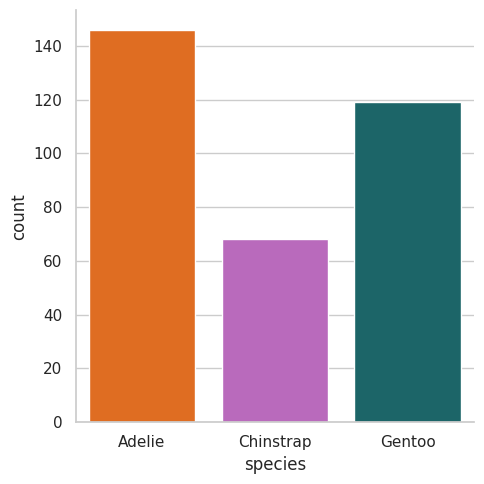

In [116]:
sns.catplot(
    data=penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
);

In [98]:
(
    penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
)

,species,count
0,Adelie,146
1,Gentoo,119
2,Chinstrap,68


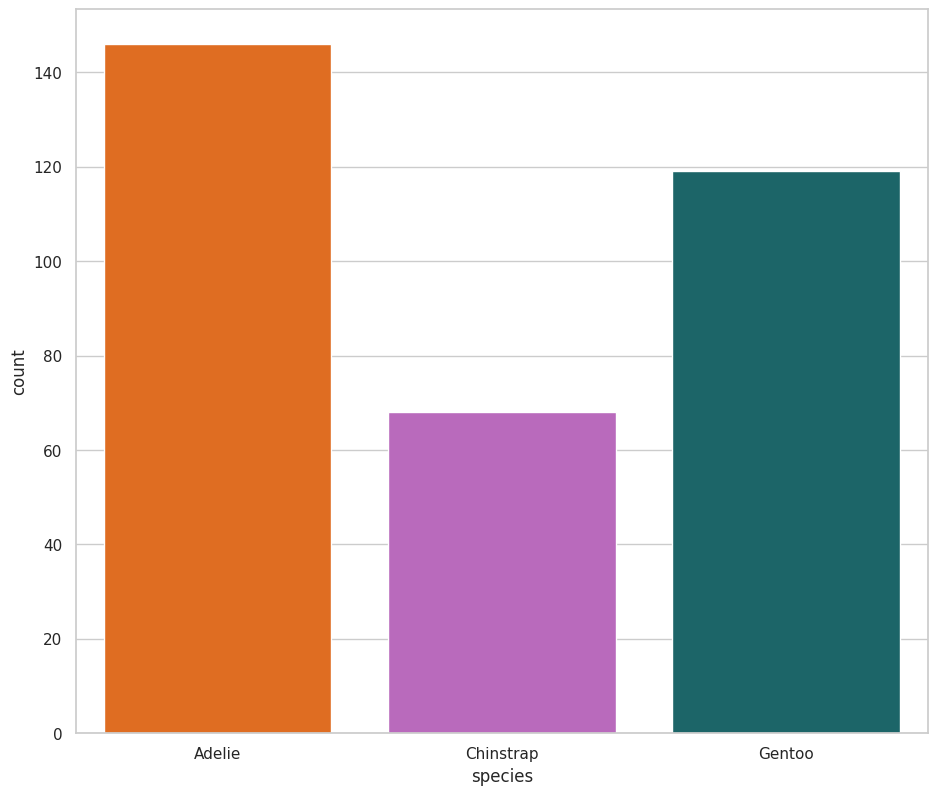

In [115]:
# Otra forma de hacerlo

(
    penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:  (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
);

### ¿Cómo visualizar las proporciones?

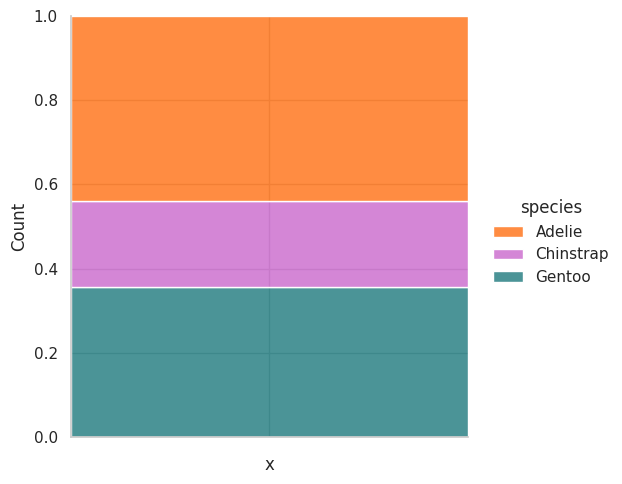

In [114]:
(
    penguins_df
    .add_column('x','')
    .pipe(
        lambda df:  (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color,

            )
        )
    )
);

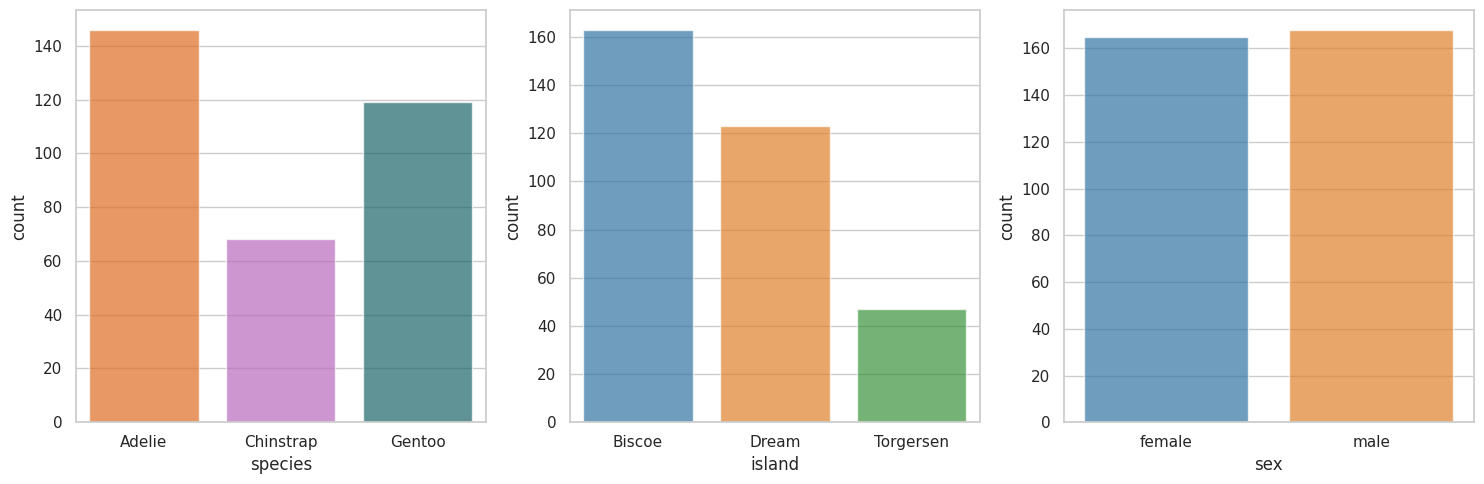

In [113]:
import matplotlib.pyplot as plt

category_cols = penguins_df.select_dtypes('category').columns

fig, ax = plt.subplots(1, len(category_cols), figsize=(15, 5))
for i, col in enumerate(category_cols):
    # Usamos sns.countplot para simplificar el conteo y la graficación
    if i == 0:
        sns.countplot(data=penguins_df, x=col, ax=ax[i], alpha=0.7, palette=penguin_color)
    else:
        sns.countplot(data=penguins_df, x=col, ax=ax[i], alpha=0.7)

plt.tight_layout()
plt.show()


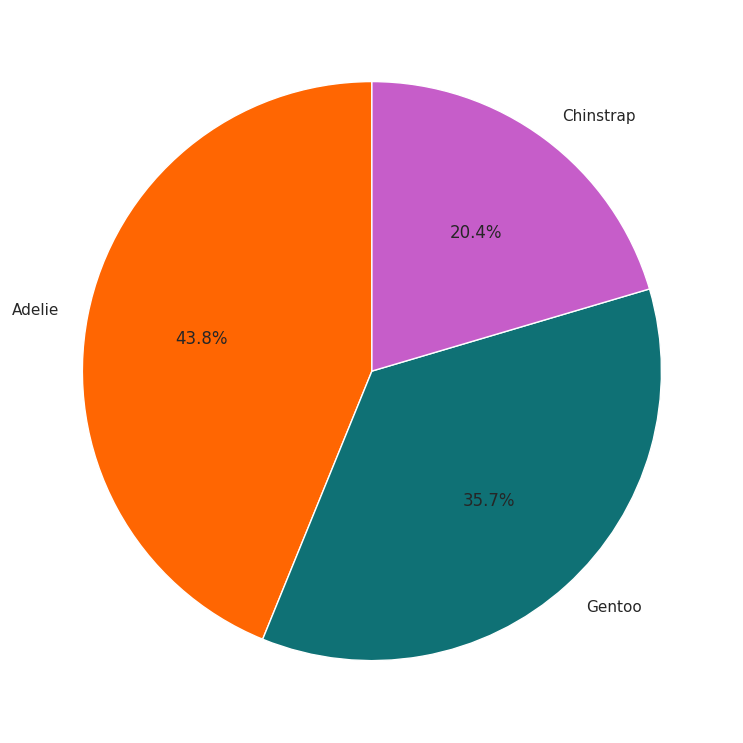

In [118]:
(
    penguins_df
    .value_counts('species')
    .pipe(
        lambda sp: (
            plt.pie(
                sp.values,
                labels=sp.index,
                colors=penguin_color.values(),
                autopct='%1.1f%%',
                startangle=90,
            )
        )
    )
);

## Medidas de tendencia central

### Media o promedio

In [120]:
penguins_df.bill_depth_mm.mean()

17.164864864864867

In [122]:
penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

### Mediana

In [124]:
penguins_df.median()

/tmp/ipykernel_10398/3721112766.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

### Moda

In [126]:
penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [128]:
penguins_df.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## Medidas de dispersión

### Rango

### Rango intercuartílico

### Desviación estándar